<a href="https://colab.research.google.com/github/RITIK1442840127/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Capstone_Project_2_Yes_Bank_Stock_Closing_Price_Prediction_RITIK_TIWARI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>



## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

##**What is stock?**

A Stock or share (also known as a company’s “equity”) is a financial instrument that represents ownership in a company.

Since, we've the **YES BANK** Stock price dataset which has the monthly stock prices of the bank since its inception. 
It contains the following features:

* **Date:** It denotes date of investment done (in our case we have month and year).
* **Open:** Open means the price at which a stock started trading when the opening bell rang.
* **High:**  High refer to the maximum prices in a given time period.
* **Low:**  Low refer to the minimum prices in a given time period.
* **Close:** Close refers to the price of an individual stock when the stock exchange closed for the day.

**First, we import required libraries:**

In [53]:
#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# **Reading the data**

The Dataset has Opening, Highest, Lowest and the Closing Prices of the Stock in every month. For this analysis,we select only Closing Stock Prices.

In [54]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv("/content/data_YesBank_StockPrices.csv")

In [55]:
# print first 5 rows of the dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


#**Data Preprocessing**

In [56]:
#Take a look at data
#first 5 rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [57]:
#last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


--Data available from Jul 2005 to Nov 2020.

In [58]:
#shape of data
df.shape

(185, 5)

In [59]:
#Details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


-- Will need to change data type of date to datetime.

In [60]:
#Summarry of dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Missing Values:-**

In [61]:
#Looking for missing values
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

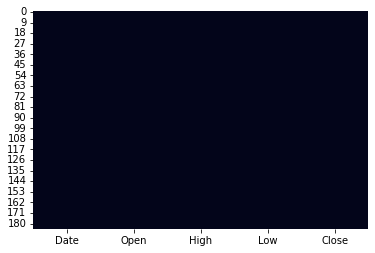

In [62]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

-- No missing values in dataset.

**Duplicate Rows:-**

In [63]:
#Looking for duplicates in dataset
len(df[df.duplicated()])

0

**Data Type Change:-**

In [64]:
#importing datetime
from datetime import datetime
#parsing date which is string of format %b-%y to datetime (%b is for Jul i.e month short form and %y is for year in two digit)
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [65]:
#lets look at dataset after date format change
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


-- Yes!! Format and data type of date feature changed into datetime.

**Data preprocessing finished.**
Dataset is clean and ready for exploratory data analysis.

#**Exploratory Data Analysis**

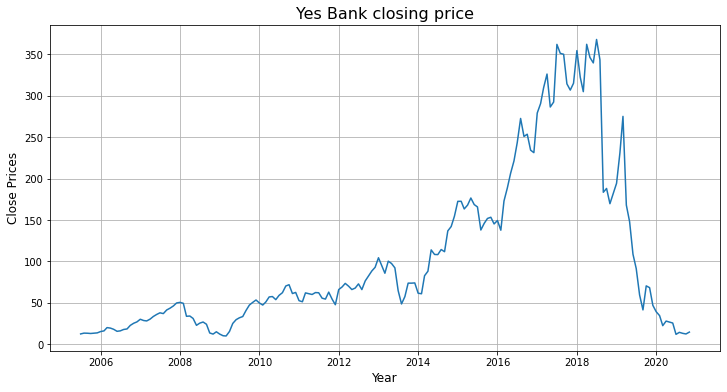

In [67]:
#plotting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close Prices', fontsize=12)
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank closing price', fontsize=16)
plt.show()

As we can see here the stock close price decreased after year 2018 the probably because of Rana Kapoor case and hitted the stock price heavily.

**Lets visualize close, open, low and high in combined line plot.**

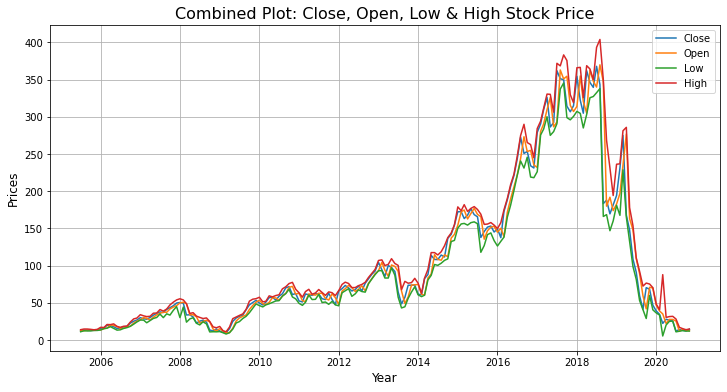

In [68]:
# Combined Line Plot for all features with respect to date.
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.grid()

--All the prices shows almost similar trends with each other. 

-- Which means that this features may be strongly correlated with each other.

##**Distribution of dependant variable i.e Close Price of stock.**

In [69]:
#make a list of independant numerical variables
numerical_features = list(set(df.describe().columns) - {'Close'})
numerical_features

['High', 'Low', 'Open']

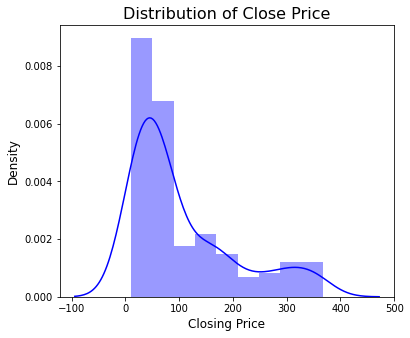

In [70]:
#distribution plot of Close price to look for normal distribution
plt.figure(figsize=(6,5))
sns.distplot(df['Close'],color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

--Distribution plot of closing price is right skewed.

--To make it normal distribution apply log transformation.

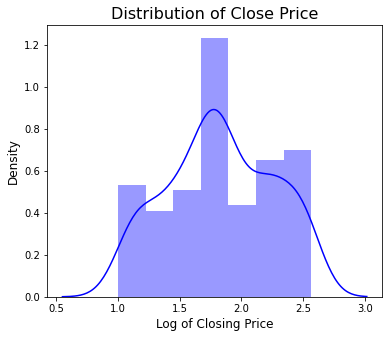

In [71]:
#distribution plot of Close price by applying log transformation
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Log of Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

--After log transformation, distribution of closing price is more normal.

##**Distribution of numerical features i.e High, Low and Open price of stock.**

<function matplotlib.pyplot.show>

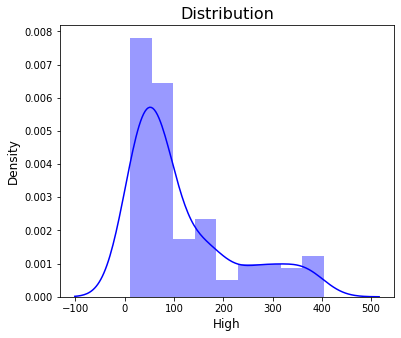

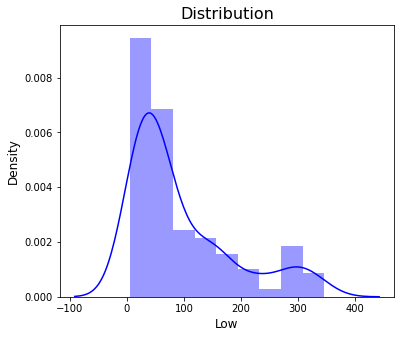

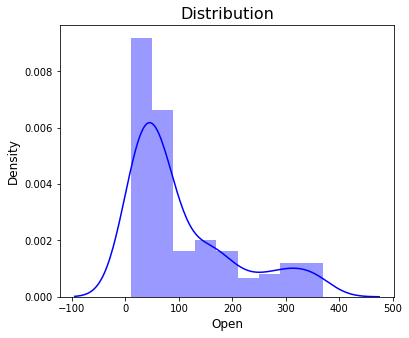

In [72]:
#Plotting distribution for each of numerical features.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(df[col], color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

--All numerical features distribution are right skewed.


--Apply log transformation to make them normally distributed.

<function matplotlib.pyplot.show>

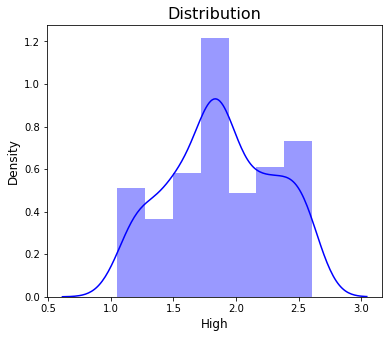

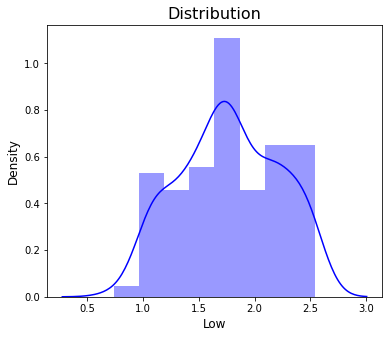

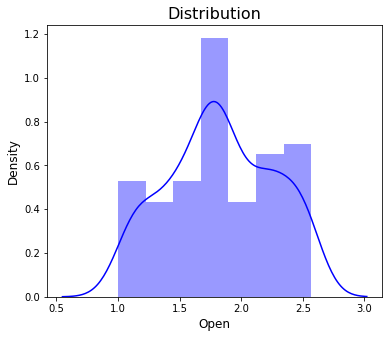

In [73]:
#Plotting distribution for each of numerical features by applying log transformation
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(np.log10(df[col]), color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

--Now we have normally distributed numerical features.

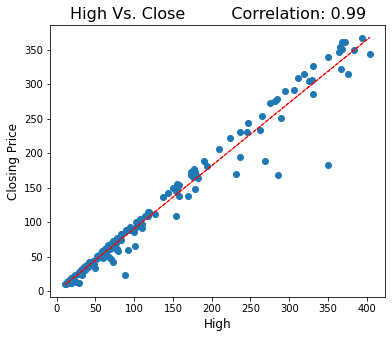

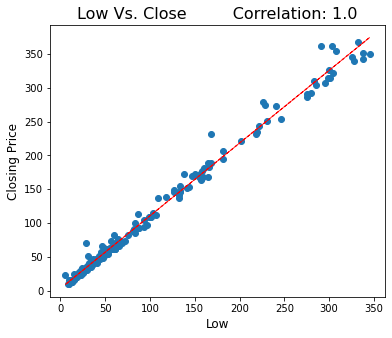

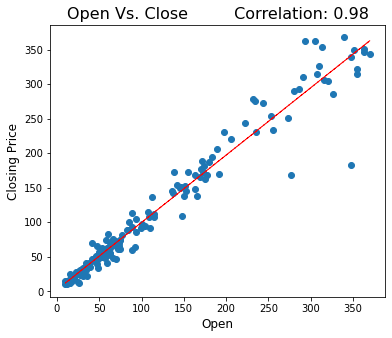

In [74]:
for col in numerical_features:
   fig = plt.figure(figsize=(6, 5))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col, fontsize=12)
   plt.ylabel('Closing Price', fontsize=12)
   ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)

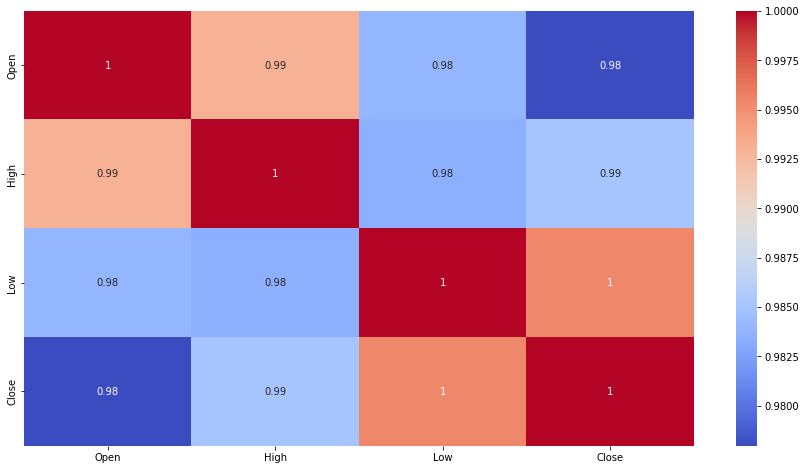

In [75]:
## Correlation
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

--All variables shows high correlation with each other.

#**Transforming & Spliting Data**

In [76]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


X = Independant Variable values


y = Dependent Variable values

In [77]:
# Splitting our data into Dependent and Independent Variables
X = df[['Open', 'High', 'Low']]
y = df['Close']

Data must be normal distributed. So applying narmalization on X & y.

**Normalisation**

In [78]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

**Train(80%) & Test(20%) Split**

In [79]:
# Spliting Data into Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [80]:
#checking shape of training dataset.
X_train.shape

(148, 3)

In [81]:
#checking shape of testing dataset.
X_test.shape

(37, 3)